# `U.S. Medical Insurance Costs`

The purpose of this project is to explore, analyze, and visualize a dataset containing U.S. medical insurance costs. 

The data was obtained from Kaggle at https://www.kaggle.com/datasets/mirichoi0218/insurance.

<b>Objectives:</b>
- Explore and visualize the dataset
    - Obtain summary statistics for quantitative variables (age, bmi, children, and charges)
    - Graph histograms and box-and-whisker plots for quantitative variables (age, bmi, children, and charges)
    - Graph pie and bar plots for qualitative variables (sex, smoker, and region)
- Examine relationship between each available variable and ultimate insurance costs
    - Determine which single variable has the greatest impact on insurance costs
- Summarize project outcomes
    - Key findings
    - Possible shortcomings / biases within dataset

# Step 1: Import and Clean Data

In [2]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
# Read in the CSV as df
df = pd.read_csv('insurance.csv')

# Examine the columns and a random sample from the dataset
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
1102,29,male,38.94,1,no,southeast,3471.4096
1068,63,male,21.66,1,no,northwest,14349.8544
1103,58,male,36.08,0,no,southeast,11363.2832
971,34,female,23.56,0,no,northeast,4992.3764
674,44,female,43.89,2,yes,southeast,46200.9851
178,46,female,28.90,2,no,southwest,8823.2790
322,34,male,30.80,0,yes,southwest,35491.6400
284,52,female,31.20,0,no,southwest,9625.9200
216,53,female,26.60,0,no,northwest,10355.6410
1052,49,male,29.83,1,no,northeast,9288.0267


In [4]:
# Check for nulls, Dtypes, and number of rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Check for duplicates
df.drop_duplicates()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### `Notes:`

Looks like the data is fairly straightforward and really doesn't need much cleaning, at least right off the bat. We have 1338 unique rows with no duplicates or null values mixed into the dataset.

Each row appears to represent an individual insurance consumer and contains data across seven variable columns:
1. <b>Age</b> (int64) 
2. <b>Sex</b> (object) 
3. <b>BMI</b> (float64)  
4. <b>Children</b> (int64) 
5. <b>Smoker</b> (object) 
6. <b>Region</b> (object) 
7. <b>Charges</b> (float64) 

We have a mix of categorical and numerical data types, but the data types for each column appear correct as well.

# Step 2: Explore and Visualize the Dataset

### `Summary Statistics:`

For numerical variables, we can quickly grab some descriptive statistics and start to do some graphing to visualize the data.

In [6]:
# Get summary statistics for numerical columns
round(df.describe(), 2)

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


### `Quantitative Variable Visualizations:`

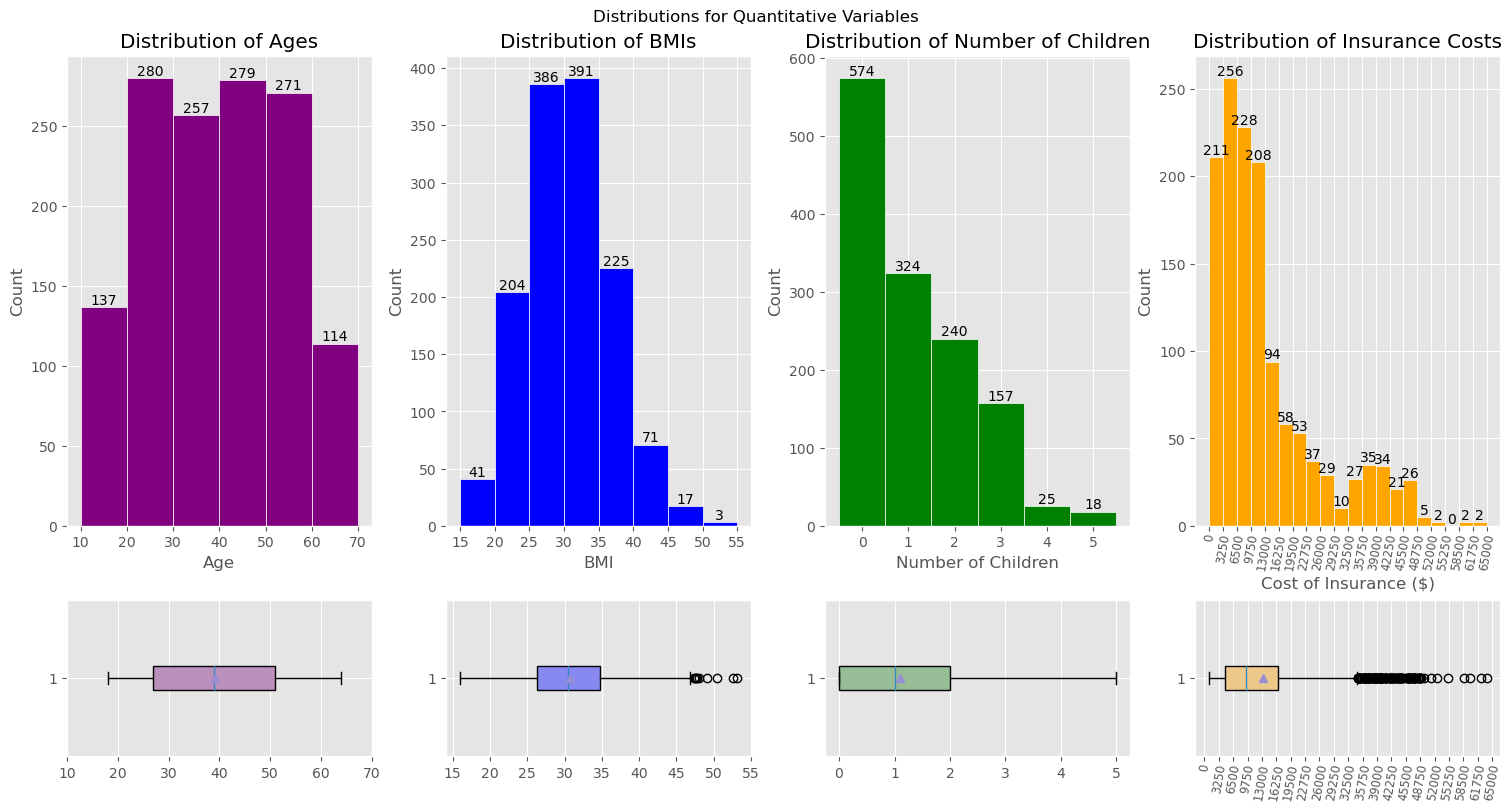

In [28]:
# Visualize numerical variables with distributions

# Set up fig with 2x4 subplots
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(15,8), layout='constrained', gridspec_kw={'height_ratios': [3, 1]})
fig.suptitle('Distributions for Quantitative Variables')

# Graph 1: Histogram of ages
ax1_values, ax1_bins, ax1_bars = ax1.hist(df.age, 
                                          bins=[10,20,30,40,50,60,70], 
                                          color='purple', 
                                          edgecolor='white')
ax1.set_title('Distribution of Ages')
ax1.set_xlabel('Age')
ax1.set_xticks(ax1_bins)
ax1.set_ylabel('Count')
ax1.bar_label(ax1_bars)

# Graph 2: Histogram of BMI
ax2_values, ax2_bins, ax2_bars = ax2.hist(df.bmi, 
                                          bins=[15,20,25,30,35,40,45,50,55], 
                                          color='blue', 
                                          edgecolor='white')
ax2.set_title('Distribution of BMIs')
ax2.set_xlabel('BMI')
ax2.set_xticks(ax2_bins)
ax2.set_ylabel('Count')
ax2.bar_label(ax2_bars)

# Graph 3: Histogram of children
ax3_values, ax3_bins, ax3_bars = ax3.hist(df.children, 
                                          bins= np.arange(7) - 0.5, 
                                          color='green', 
                                          edgecolor='white')
ax3.set_title('Distribution of Number of Children')
ax3.set_xlabel('Number of Children')
ax3.set_xticks(range(6))
ax3.set_ylabel('Count')
ax3.bar_label(ax3_bars)


# Graph 4: Histogram of charges
ax4_values, ax4_bins, ax4_bars = ax4.hist(df.charges, 
                                          color='orange', 
                                          edgecolor='white', 
                                          bins=20, 
                                          range=(0, 65000))
ax4.set_title('Distribution of Insurance Costs')
ax4.set_xlabel('Cost of Insurance ($)')
ax4.set_xticks(ax4_bins)
ax4.tick_params(axis='x', 
                labelrotation=80, 
                labelsize='small', 
                pad=1)
ax4.set_ylabel('Count')
ax4.bar_label(ax4_bars)

# Graph 5: Box plot of ages
ax5.boxplot(df.age, 
            vert=False, 
            showmeans=True, 
            showcaps=True, 
            patch_artist = True, 
            boxprops = dict(facecolor = '#BB90BD'))
ax5.set_xticks(ax1_bins)

# Graph 6: Box plot of BMIs
ax6.boxplot(df.bmi, 
            vert=False, 
            showmeans=True, 
            showcaps=True, 
            patch_artist = True, 
            boxprops = dict(facecolor = '#8888F1'))
ax6.set_xticks(ax2_bins)


# Graph 7: Box plot of children
ax7.boxplot(df.children, 
            vert=False, 
            showmeans=True, 
            showcaps=True, 
            patch_artist = True, 
            boxprops = dict(facecolor = '#96BD95'))
ax7.set_xticks(range(6))

# Graph 8: Box plot of charges
ax8.boxplot(df.charges, 
            vert=False, 
            showmeans=True, 
            showcaps=True, 
            patch_artist = True, 
            boxprops = dict(facecolor = '#EDC88B'))
ax8.set_xticks(ax4_bins)
ax8.tick_params(axis='x', 
                labelrotation=80, 
                labelsize='small', 
                pad=1)

plt.show()

### `Categorical Variable Visualizations:`

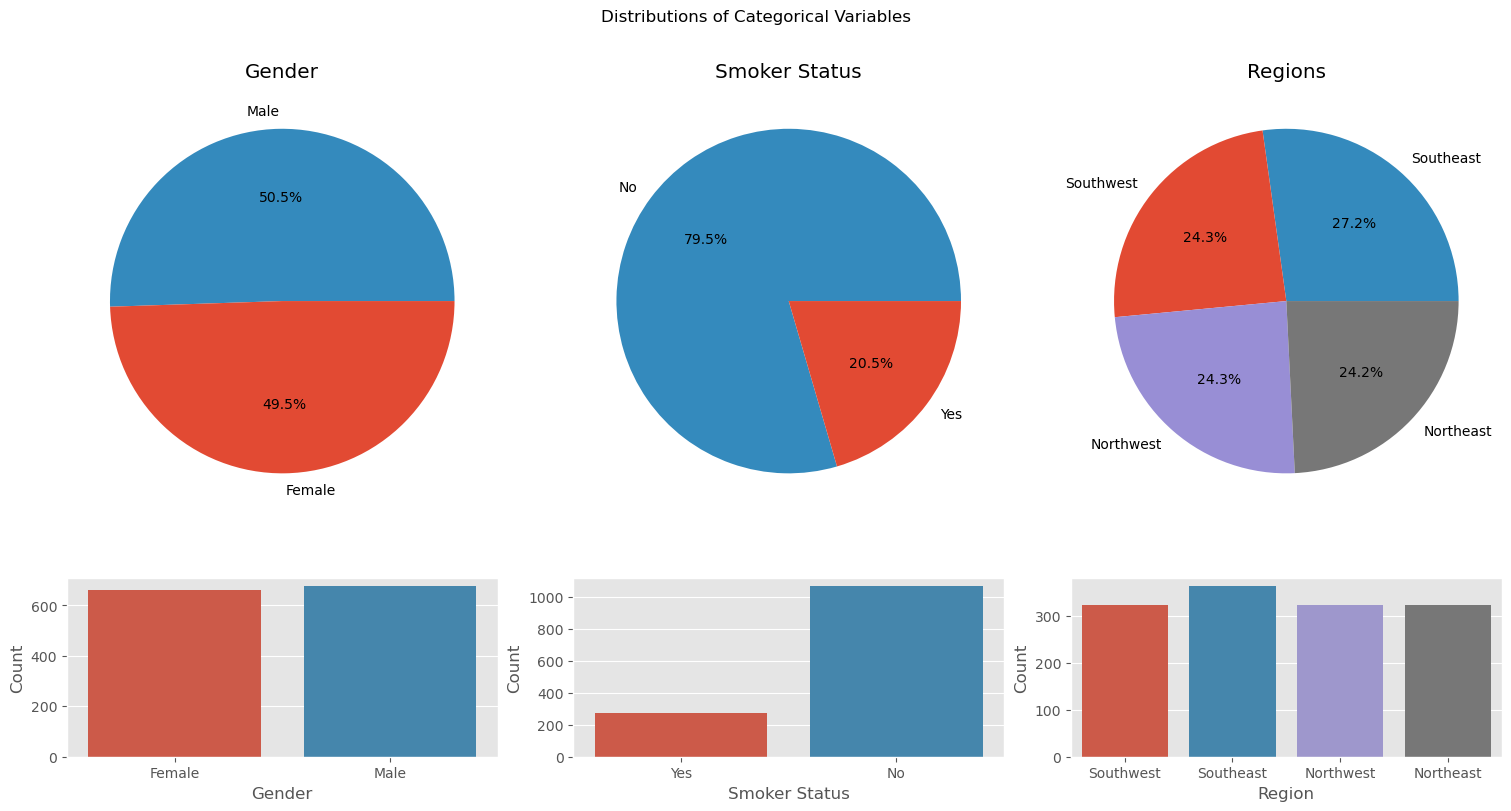

In [9]:
# Visualize categorical data

# Define color dictionaries for consistent coloration across plots
colors_sex={'male': 'C1',
            'female': 'C0'}

colors_smoker={'yes': 'C0',
               'no': 'C1'}

colors_region={'southwest': 'C0',
               'southeast': 'C1',
               'northwest': 'C2',
               'northeast': 'C3'}


# Set up fig with 2x3 subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15,8), layout='constrained', gridspec_kw={'height_ratios': [3, 1]})
fig.suptitle('Distributions of Categorical Variables')

# Graph 1: Male vs Female Pie
ax1.pie(df.sex.value_counts(), 
        labels=['Male', 'Female'], 
        autopct='%1.1f%%', 
        colors=[colors_sex[key] for key in df.sex.value_counts().index])
ax1.set_title('Gender')


# Graph 2: Smoker vs. Nonsmoker Pie
ax2.pie(df.smoker.value_counts(), 
        labels=['No', 'Yes'], 
        autopct='%1.1f%%', 
        colors=[colors_smoker[key] for key in df.smoker.value_counts().index])
ax2.set_title('Smoker Status')

# Graph 3: Region by Region Pie
ax3.pie(df.region.value_counts(), 
        labels=['Southeast', 'Southwest', 'Northwest', 'Northeast'], 
        autopct='%1.1f%%', 
        colors=[colors_region[key] for key in df.region.value_counts().index])
ax3.set_title('Regions')

# Graph 4: Counts by Sex
sns.countplot(ax = ax4, x=df.sex)
ax4.set_xlabel('Gender')
ax4.set_xticklabels(['Female', 'Male'])
ax4.set_ylabel('Count')

# Graph 5: Counts by Smoker
sns.countplot(ax = ax5, x=df.smoker)
ax5.set_xlabel('Smoker Status')
ax5.set_xticklabels(['Yes', 'No'])
ax5.set_ylabel('Count')

# Graph 6: Counts by Region
sns.countplot(ax = ax6, x=df.region)
ax6.set_xlabel('Region')
ax6.set_xticklabels(['Southwest', 'Southeast', 'Northwest', 'Northeast'])
ax6.set_ylabel('Count')


plt.show()

### `Notes:` 

- <b>Age:</b> The ages in this dataset range from 18 to 64, with an average of 39.2 and median of 39. The distribution is fairly normal with little to no skew and no major outliers.
- <b>BMI:</b> The BMIs in this dataset range from 15.96 to 53.13, with an average of 30.66 and median of 30.4. The distribution is fairly normal with a slight right skew and a handful of outliers on the upper end of the range.
- <b>Children:</b> The counts of children in this dataset range from 0 to 5 with an average of 1.09 and median of 1. The distribution has a strong right skew, but no major outliers.
- <b>Insurance Cost:</b> The insurance costs in this dataset range from $1121.87 to $63770.43 with an average of $13270.42 and median of $9382.03. The data has a very strong right skew and a large number of outliers, some of theme extreme, on the upper end of the range.
- <b>Sex:</b> The data is almost perfectly evenly devided between men and women.
- <b>Smoker:</b> The data is mostly representative of non-smokers, with only about 20% of the data coming from smokers.
- <b>Region:</b> The data respresents each of the four regions very close to evenly.

# Step 3: Evaluate Relationships Between Variables

## 3(i): Visualizing Quantitative Variable Relationships

The most obvious likely relationships are between: 
- age and insurance cost 
- BMI and insurance cost

We'll investigate those first, and use the categorical variables (plus children, which can really function as either a categorical or numerical variable depending on our needs) to color our visual reading of those relationships.

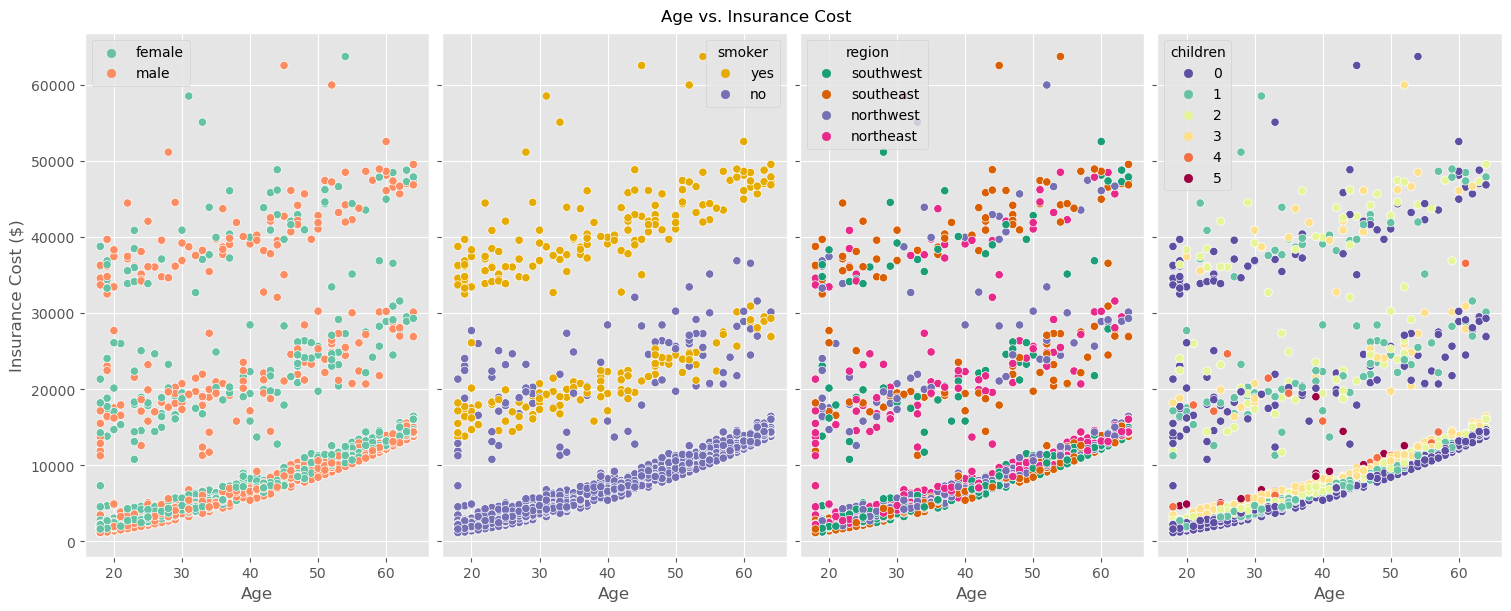

In [10]:
# Age vs Insurance Cost (by sex, by smoker, by region)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15,6), layout='constrained', sharey=True)
fig.suptitle('Age vs. Insurance Cost')

# Graph 1: Age vs. Insurance Cost by Sex
sns.scatterplot(ax=ax1, 
                x=df.age, 
                y=df.charges, 
                hue=df.sex, 
                palette='Set2')
ax1.set_xlabel('Age')
ax1.set_ylabel('Insurance Cost ($)')
ax1.legend()

# Graph 2: Age vs. Insurance Cost by Smoker
sns.scatterplot(ax=ax2, 
                x=df.age, 
                y=df.charges, 
                hue=df.smoker, 
                palette='Dark2_r')
ax2.set_xlabel('Age')
ax2.set_ylabel('Insurance Cost')

# Graph 3: Age vs. Insurance Cost by Region
sns.scatterplot(ax=ax3, 
                x=df.age, 
                y=df.charges, 
                hue=df.region, 
                palette='Dark2')
ax3.set_xlabel('Age')
ax3.set_ylabel('Insurance Cost')

# Graph 4: Age vs. Insurance Cost by Children
sns.scatterplot(ax=ax4, 
                x=df.age, 
                y=df.charges, 
                hue=df.children, 
                palette='Spectral_r')
ax4.set_xlabel('Age')
ax4.set_ylabel('Insurance Cost')

plt.show()

There's an interesting pattern that's starting to emerge here, and it's most visible in the second graph above (grouping smokers and nonsmokers). There are three distinct cost "bands" which all see increased cost with increased age, but look like they have their own distinct compositions. The band with lowest costs are exclusively nonsmokers, the band with the highest costs are exclusively smokers, and the middle band appears to be a mix of both smokers and non-smokers.

This middle band could represent lower-risk smokers and higher-risk nonsmokers, with risk being determined by some other health indicator like individual medical history, family medical history, or working in a high-risk occupation. We don't have visibility into any of those variables in our dataset, but we do have BMI which is often used (rightly or wrongly) as a proxy for overall health. Let's dig into these bands a bit further, separating smokers from nonsmokers and seeing if BMI is related to which band an individual falls into.

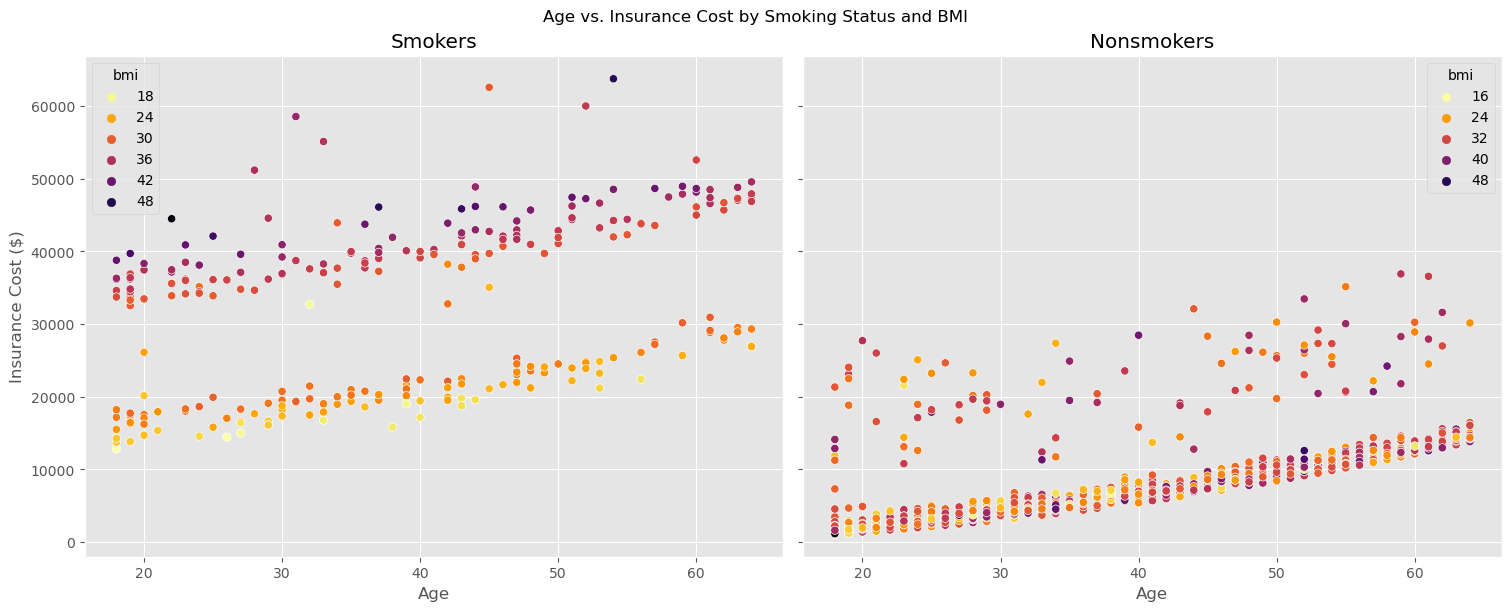

In [11]:
# Get break data out by smoking status
just_smokers = df[df['smoker'] == 'yes']
just_nonsmokers = df[df['smoker'] == 'no']

# Set up fig with 1x2 subplots 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6), layout='constrained', sharey=True)
fig.suptitle('Age vs. Insurance Cost by Smoking Status and BMI')

# Graph 1: Smokers: Age vs. Insurance Cost by BMI
sns.scatterplot(ax=ax1, 
                x=just_smokers.age, 
                y=just_smokers.charges, 
                hue=just_smokers.bmi, 
                palette='inferno_r')
ax1.set_title('Smokers')
ax1.set_xlabel('Age')
ax1.set_ylabel('Insurance Cost ($)')


# Graph 2: Nonsmokers: Age vs. Insurance Cost by BMI
sns.scatterplot(ax=ax2, 
                x=just_nonsmokers.age, 
                y=just_nonsmokers.charges, 
                hue=just_nonsmokers.bmi, 
                palette='inferno_r')
ax2.set_title('Nonsmokers')
ax2.set_xlabel('Age')
ax2.set_ylabel('Insurance Cost')

plt.show()


Bingo! It's clear in the graphs above that the highest band is primarily high-BMI smokers, the middle band is a mix of low-BMI smokers and mixed-BMI nonsmokers, and the lowest band is mixed BMI nonsmokers. BMI seems less predictive for nonsmokers, but the pattern is very clear for smokers -- higher BMIs put individuals into the highest 'band' of insurance costs.

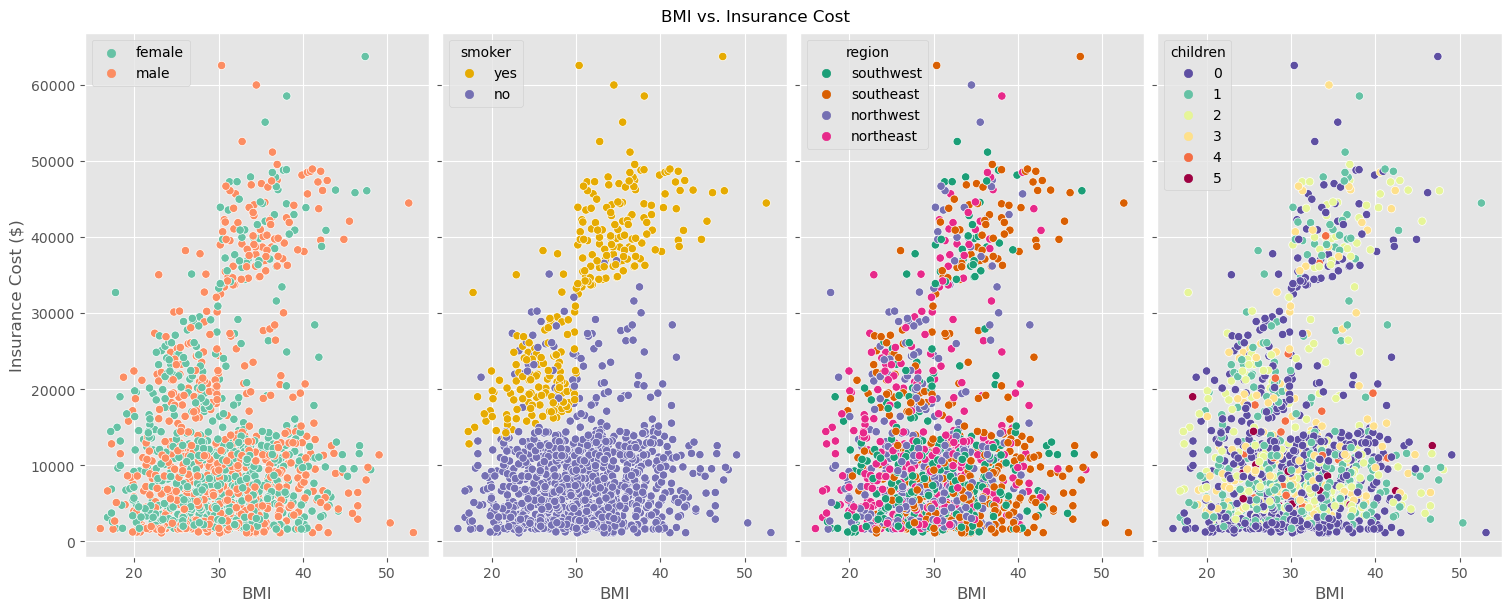

In [12]:
# BMI vs Insurance Cost (by sex, by smoker, by region)

# Set up figure with 1x4 subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15,6), layout='constrained', sharey=True)
fig.suptitle('BMI vs. Insurance Cost')

# Graph 1: BMI vs. Insurance Cost by Sex
sns.scatterplot(ax=ax1, 
                x=df.bmi, 
                y=df.charges, 
                hue=df.sex, 
                palette='Set2')
ax1.set_xlabel('BMI')
ax1.set_ylabel('Insurance Cost ($)')
ax1.legend()

# Graph 2: BMI vs. Insurance Cost by Smoker
sns.scatterplot(ax=ax2, 
                x=df.bmi, 
                y=df.charges, 
                hue=df.smoker, 
                palette='Dark2_r')
ax2.set_xlabel('BMI')
ax2.set_ylabel('Insurance Cost')

# Graph 3: BMI vs. Insurance Cost by Region
sns.scatterplot(ax=ax3, 
                x=df.bmi, 
                y=df.charges, 
                hue=df.region, 
                palette='Dark2')
ax3.set_xlabel('BMI')
ax3.set_ylabel('Insurance Cost')

# Graph 4: BMI vs. Insurance Cost by Children
sns.scatterplot(ax=ax4, 
                x=df.bmi, 
                y=df.charges, 
                hue=df.children, 
                palette='Spectral_r')
ax4.set_xlabel('BMI')
ax4.set_ylabel('Insurance Cost')

plt.show()

### `Notes:`

Visually, age and insurance cost do appear to be positively correlated; insurance costs tend to be higher for older individuals.

Smoking status also clearly has a very strong relationship with insurance cost, with smokers almost always having higher costs than their non-smoking counterparts. Likewise, there appears to also be a slight positive correlation between cost and BMI. 

Sex and region, on the other hand, don't seem to be strongly correlated with insurance costs. 

Interestingly, there appear to be three rough 'bands' of insurance costs, most visible when graphing age vs. cost. The lowest cost band appears to be non-smoking and low- to mid-BMI individuals. The middle band appears to be a combination of low- to mid- BMI smokers and mid- to high-BMI non-smokers. The highest band, predictably, appears to be mid- to high-BMI smokers. Being both a smoker and an individual with a high BMI, it seems, is a recipe for a pricier insurance cost at almost any age.

## 3(ii): Visualizing Categorical Variable Relationships

Here, we'll look at the relationships between sex, region, smoker status, and children (which, again, can be treated as either a numerical or categorical variable depending on the case) and insurance cost.

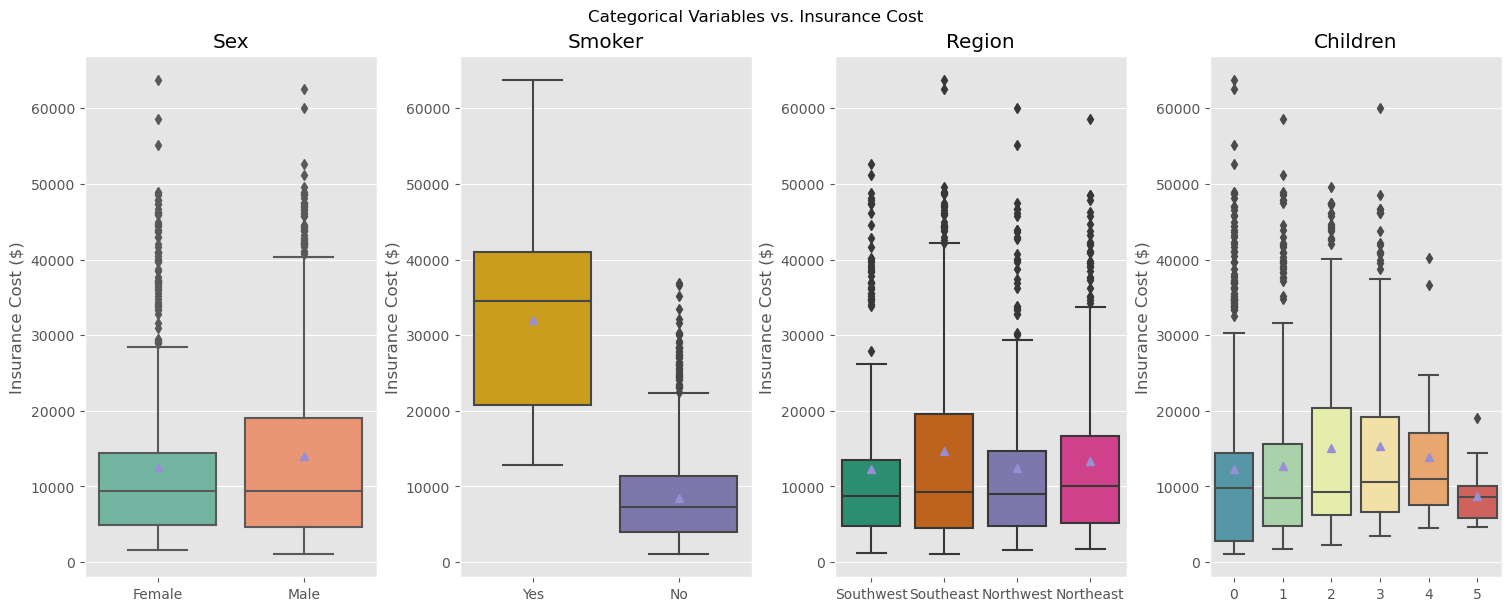

In [13]:
# Set up figure with 1x4 subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15,6), layout='constrained')
fig.suptitle('Categorical Variables vs. Insurance Cost')

# Graph 1: Sex vs Insurance Cost boxplot
sns.boxplot(ax=ax1, 
            x='sex', 
            y='charges', 
            data=df, 
            showmeans=True, 
            palette='Set2')
ax1.set_title('Sex')
ax1.set_xlabel('')
ax1.set_xticklabels(['Female', 'Male'])
ax1.set_ylabel('Insurance Cost ($)')

# Graph 2: Smoker vs Insurance Cost boxplot
sns.boxplot(ax=ax2, 
            x='smoker', 
            y='charges', 
            data=df, 
            showmeans=True, 
            palette='Dark2_r')
ax2.set_title('Smoker')
ax2.set_xlabel('')
ax2.set_xticklabels(['Yes', 'No'])
ax2.set_ylabel('Insurance Cost ($)')

# Graph 3: Region vs Insurance Cost boxplot
sns.boxplot(ax=ax3, 
            x='region', 
            y='charges', 
            data=df, 
            showmeans=True, 
            palette='Dark2')
ax3.set_title('Region')
ax3.set_xlabel('')
ax3.set_xticklabels(['Southwest', 'Southeast', 'Northwest', 'Northeast'])
ax3.set_ylabel('Insurance Cost ($)')

# Graph 4: Children vs Insurance Cost boxplot
sns.boxplot(ax=ax4, 
            x='children', 
            y='charges', 
            data=df, 
            showmeans=True, 
            palette='Spectral_r')
ax4.set_title('Children')
ax4.set_xlabel('')
ax4.set_ylabel('Insurance Cost ($)')

plt.show()

In [14]:
# Define function to get average cost for each possible value of each categorical variable column
def get_cat_var_means(cat_var_columns_list):
    vars_means_dict = {}
    for column in cat_var_columns_list:
        unique_values = df[column].unique()
        for value in unique_values:
            mean_of_value = df[df[column] == value]['charges'].mean()
            vars_means_dict[value] = mean_of_value
    for key, value in vars_means_dict.items():
        print(f'{key} mean: {round(value, 2)}')

get_cat_var_means(['sex', 'smoker', 'region', 'children'])

female mean: 12569.58
male mean: 13956.75
yes mean: 32050.23
no mean: 8434.27
southwest mean: 12346.94
southeast mean: 14735.41
northwest mean: 12417.58
northeast mean: 13406.38
0 mean: 12365.98
1 mean: 12731.17
3 mean: 15355.32
2 mean: 15073.56
5 mean: 8786.04
4 mean: 13850.66


As we can see in the above graphs and the list of means, most categorical variables only have a marginal impact on insurance costs. For instance, insurance for men is on average slightly more expensive than for women ($13,956.75 versus $12,569.58, respectively). In terms of regions, individuals in the Southeast have the highest average cost ($14,735.51) while individuals in the Southwest have the lowest average cost ($12,346.94).

The picture is a bit more nuanced when it comes to number of children -- average costs increase slightly with each child ($12,365.98 for 0 children up to $15,355.32 for 3 children) then drop off dramatically from there (to $13,850.66 for 4 children all the way down to $8,786.04 for 5 children). The average cost for individuals with 5 children are almost half of that of those with 3 children. 

Unsurprisingly, the categorical variable that has the greatest impact on insurance cost is smoker status. The average cost for a smoker ($32,050.23) is almost four times higher than average cost for a non-smoker ($8,434.27).

## 3(iii): Visualizing Correlations

In [15]:
df_corr = df[['age', 'bmi', 'children', 'charges']].corr()
df_corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<Axes: >

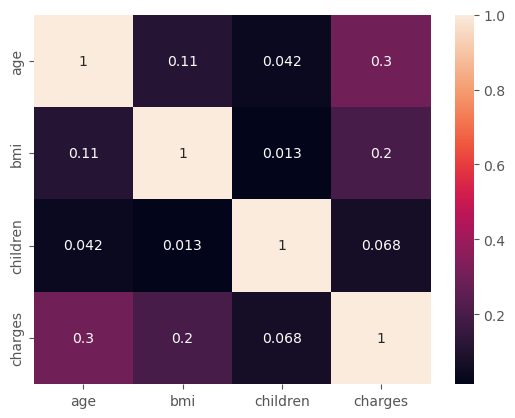

In [16]:
sns.heatmap(df_corr, annot=True)

There really aren't very strong correlations here -- age and BMI both correlate positively with insurance cost, but only weakly.

# Step 4: Summarize Project Outcomes

`Key Findings:`
- Smoking status is *by far* the most significant driver in insurance costs in this dataset. The average cost for a smoker was $32,050.23, almost four times higher than the average of $8,434.27 for non-smokers.
    - See Fig. 1 below.
- There are three broad cost groups:
    - High-BMI smokers (highest cost)
    - Low-BMI smokers and mixed-BMI nonsmokers (medium cost)
    - Mixed-BMI nonsmokers (lowest cost)
        - BMI clearly drives placement in these groups for smokers 
        - For nonsmokers, it is less clear what determines whether they are in the medium or low cost group and may be a factor not captured by this dataset (exe. personal medical history)
        - See Fig. 2 below.
- All three groups saw their costs increase with age
    - See Fig. 2 below.
- Average insurance costs increased with the number of children an individual had from zero ($12,365.98) up until the third child ($15,355.32), at which point is decreased dramatically the fourth ($13,850.66) and fifth child ($8,786.04).
    - See Fig. 3 below.
- Men ($13,956.75) saw slightly higher average costs than women ($12,569.58)
    - See Fig. 4 below.

`Dataset Quality:`
- The initial dataset had clear labels, complete observations (no nulls), no duplicate observations, and standardized values for each feature. No major transformations were required for analysis.
- Most groups were evenly represented in the data, with the exception of smokers who comprised only about a quarter of individuals in the dataset.



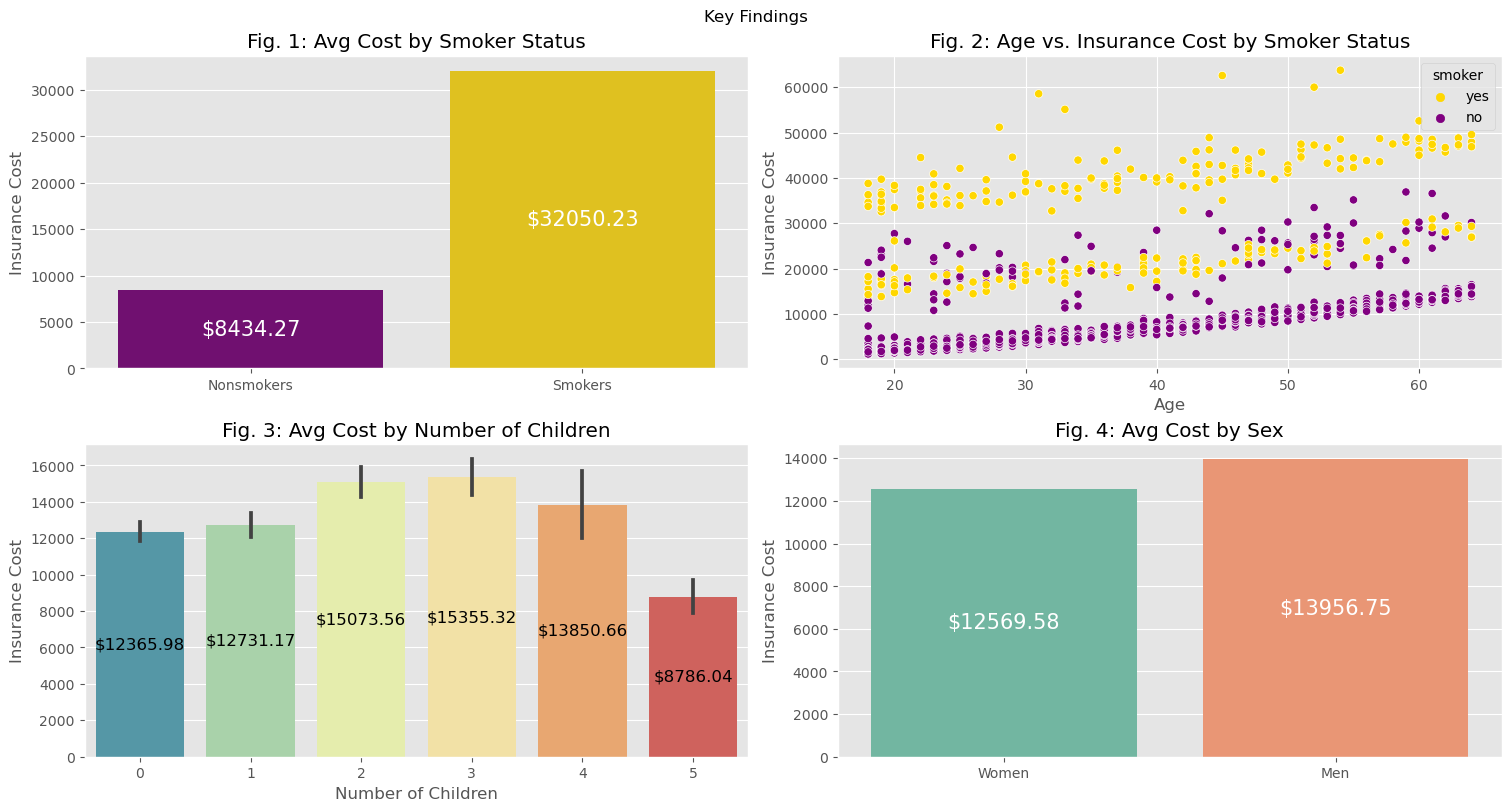

In [17]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,8), layout='constrained')
plt.suptitle('Key Findings')

# Graph 1: Smoking vs. Nonsmoking Avg Cost
ax1 = sns.barplot(ax=ax1, data=df, 
            x=['Nonsmokers', 'Smokers'], 
            y=df.groupby('smoker')['charges'].agg('mean'),
            palette=['purple', 'gold'])
ax1.set_title('Fig. 1: Avg Cost by Smoker Status')
ax1.set_ylabel('Insurance Cost')
ax1.bar_label(ax1.containers[0], 
              label_type='center',
              fontsize=15,
              color='w',
              fmt='$%.2f')

# Graph 2: Age vs. Insurance Costs by Smoker Status
sns.scatterplot(ax=ax2, 
                x=df.age, 
                y=df.charges, 
                hue=df.smoker, 
                palette=['gold', 'purple'])
ax2.set_title('Fig. 2: Age vs. Insurance Cost by Smoker Status')
ax2.set_xlabel('Age')
ax2.set_ylabel('Insurance Cost')

# Graph 3: Avg cost by # of children
ax3 = sns.barplot(ax=ax3, data=df, 
            x='children', 
            y='charges',
            palette='Spectral_r',
            errorbar='se')
ax3.set_title('Fig. 3: Avg Cost by Number of Children')
ax3.set_xlabel('Number of Children')
ax3.set_ylabel('Insurance Cost')
ax3.bar_label(ax3.containers[0], 
              label_type='center',
              fontsize=12,
              color='black',
              fmt='$%.2f')

# Graph 4: # Avg Cost by Gender
ax4 = sns.barplot(ax=ax4, data=df, 
            x=['Women', 'Men'], 
            y=df.groupby('sex')['charges'].agg('mean'),
            palette='Set2')
ax4.set_title('Fig. 4: Avg Cost by Sex')
ax4.set_ylabel('Insurance Cost')
ax4.bar_label(ax4.containers[0], 
              label_type='center',
              fontsize=15,
              color='w',
              fmt='$%.2f')

plt.show()